In [2]:
import numpy as np
import pandas as pd

In [3]:
data = pd.read_csv('Clustering/clusters.csv')

In [4]:
data.head()

,A,B,C
0,-0.087492,0.398000,0.014275
1,-1.071705,-0.546473,0.072424
2,2.747075,2.012649,3.083964
3,3.217913,2.213772,4.260312
4,-0.607273,0.793914,-0.516091


In [5]:
features= data[data.columns[0:6]]
features.head()

,A,B,C
0,-0.087492,0.398000,0.014275
1,-1.071705,-0.546473,0.072424
2,2.747075,2.012649,3.083964
3,3.217913,2.213772,4.260312
4,-0.607273,0.793914,-0.516091


In [7]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

scaled_features = MinMaxScaler().fit_transform(features[data.columns[0:6]])
pca = PCA(n_components=2).fit(scaled_features)
features_2d = pca.transform(scaled_features)
features_2d[0:5]

array([[ 0.38631524, -0.05515159],
       [ 0.5679739 , -0.06144958],
       [-0.2979762 ,  0.08474023],
       [-0.46052216,  0.11460533],
       [ 0.44134723, -0.16034683]])

In [10]:
model = KMeans(n_clusters=4, init='k-means++', max_iter=1000, n_init=100)
km_clusters = model.fit_predict(features.values)
km_clusters

array([2, 2, 3, 3, 2, 2, 3, 1, 2, 2, 3, 0, 0, 1, 1, 1, 3, 0, 1, 1, 2, 1,
       2, 2, 1, 0, 3, 2, 0, 1, 0, 2, 3, 1, 1, 2, 1, 1, 2, 1, 1, 1, 3, 0,
       3, 2, 2, 3, 3, 1, 2, 0, 3, 3, 3, 3, 1, 2, 3, 2, 2, 2, 2, 2, 1, 1,
       0, 1, 0, 3, 0, 1, 1, 3, 0, 1, 1, 1, 2, 0, 1, 0, 3, 0, 1, 3, 0, 1,
       1, 0, 0, 0, 3, 1, 0, 1, 3, 1, 3, 0, 1, 0, 3, 0, 1, 0, 3, 1, 1, 3,
       1, 0, 2, 2, 0, 3, 0, 3, 2, 0, 1, 0, 3, 3, 2, 1, 0, 1, 3, 2, 0, 0,
       0, 1, 0, 0, 1, 2, 1, 0, 2, 0, 0, 2, 3, 3, 1, 3, 1, 1, 3, 2, 2, 1,
       2, 0, 2, 1, 1, 1, 0, 2, 3, 3, 1, 0, 0, 2, 2, 3, 2, 0, 1, 3, 1, 0,
       0, 1, 1, 2, 1, 2, 0, 0, 1, 3, 2, 3, 3, 0, 0, 2, 0, 1, 3, 0, 1, 1,
       2, 3, 0, 3, 3, 3, 2, 2, 3, 1, 3, 2, 3, 3, 0, 2, 3, 1, 1, 3, 2, 3,
       1, 2, 0, 3, 0, 1, 0, 2, 0, 2, 1, 2, 0, 1, 2, 3, 3, 2, 3, 0, 3, 0,
       3, 1, 1, 0, 3, 2, 2, 1, 3, 1, 0, 0, 3, 3, 3, 2, 3, 2, 1, 3, 3, 1,
       2, 1, 0, 0, 0, 1, 3, 2, 1, 0, 2, 0, 3, 1, 1, 2, 3, 3, 0, 2, 2, 3,
       3, 0, 3, 2, 2, 0, 2, 3, 3, 3, 1, 1, 0, 2, 3,

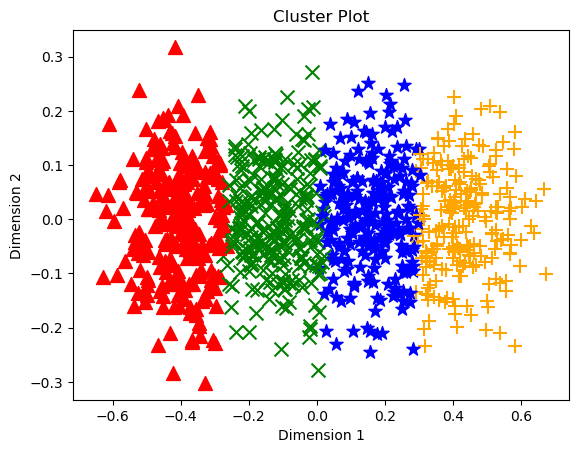

In [11]:
import matplotlib.pyplot as plt

def plot_clusters(samples, clusters):
    col_dic = {0:'blue', 1:'green', 2:'orange', 3:'red'}
    mrk_dic = {0:'*', 1:'x', 2:'+', 3:'^'}
    colors = [col_dic[x] for x in clusters]
    markers = [mrk_dic[x] for x in clusters]
    for sample in range(len(clusters)):
        plt.scatter(samples[sample][0], samples[sample][1], color=colors[sample], marker=markers[sample], s=100)
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.title('Cluster Plot')
    plt.show()

plot_clusters(features_2d, km_clusters)

In [12]:
from sklearn.cluster import AgglomerativeClustering

agg_model = AgglomerativeClustering(n_clusters=4)
agg_clusters = agg_model.fit_predict(data)
#agg_clusters

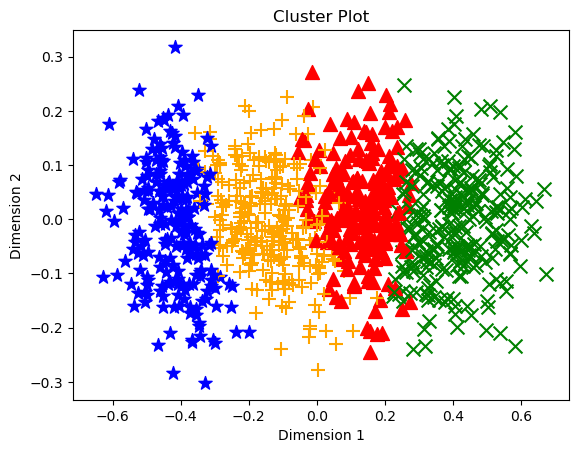

In [13]:
plot_clusters(features_2d, agg_clusters)